<a href="https://colab.research.google.com/github/davetew/Modern-Aerospace-Propulsion/blob/main/Aircraft_Propulsion_System_Design_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aircraft Propulsion System Design Project
This notebook is being developed to support the conceptual design of aircraft propulsion systems for selected aircraft and associated missions.

In [1]:
# Install the required non-colab-standard python packages for the atmospheric model (ambiance) and route distances (geopy)
!pip install -q ambiance geopy

In [13]:
# Import the required python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # Mac retina display resolution for plots

from ambiance import Atmosphere
import geopy.distance
from geopy.geocoders import Nominatim

# Initialize the geolocator with a user agent (can be any unique string)
geolocator = Nominatim(user_agent="my_geocoder_app")

## Route Distances
In this section, the great circle route distances between the origin and destination cities of the selected missions are calculated using `geopy`.

In [11]:
# Generate a list of cities of interest
cities = ['New York City', 'Los Angeles', 'London', 'Tokyo', 'Singapore']

# Create a dataframe to store the location information
city_locations = pd.DataFrame(index=cities, columns=['Latitude', 'Longitude'])

# Loop through the cities and get the location data
for city in cities:

  # Geocode the city name to get location data
  location = geolocator.geocode(city)

  if location:
    city_locations.loc[city, 'Latitude'] = location.latitude
    city_locations.loc[city, 'Longitude'] = location.longitude
  else:
    print(f"Could not find location for {city}")

display(city_locations)

,Latitude,Longitude
New York City,40.712728,-74.006015
Los Angeles,34.053691,-118.242766
London,51.489334,-0.144055
Tokyo,35.67686,139.763895
Singapore,1.357107,103.819499


In [12]:
# Calculate the great circle route distances between each city & save them in a dataframe
great_circle_distances_km = pd.DataFrame(index=cities, columns=cities)
for i in range(len(cities)):
  for j in range(i+1, len(cities)):
    origin = (city_locations.loc[cities[i], 'Latitude'], city_locations.loc[cities[i], 'Longitude'])
    destination = (city_locations.loc[cities[j], 'Latitude'], city_locations.loc[cities[j], 'Longitude'])
    distance = geopy.distance.geodesic(origin, destination).km
    great_circle_distances_km.loc[cities[i], cities[j]] = distance
    great_circle_distances_km.loc[cities[j], cities[i]] = distance

# Replace NaN with zero
great_circle_distances_km = great_circle_distances_km.fillna(0)

display(great_circle_distances_km)

/tmp/ipython-input-2860112570.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  great_circle_distances_km = great_circle_distances_km.fillna(0)


,New York City,Los Angeles,London,Tokyo,Singapore
New York City,0.000000,3944.275349,5584.801809,10871.303906,15340.036451
Los Angeles,3944.275349,0.000000,8776.952003,8829.923413,14132.788392
London,5584.801809,8776.952003,0.000000,9588.525575,10853.440710
Tokyo,10871.303906,8829.923413,9588.525575,0.000000,5311.033499
Singapore,15340.036451,14132.788392,10853.440710,5311.033499,0.000000


## Atmospheric Properties


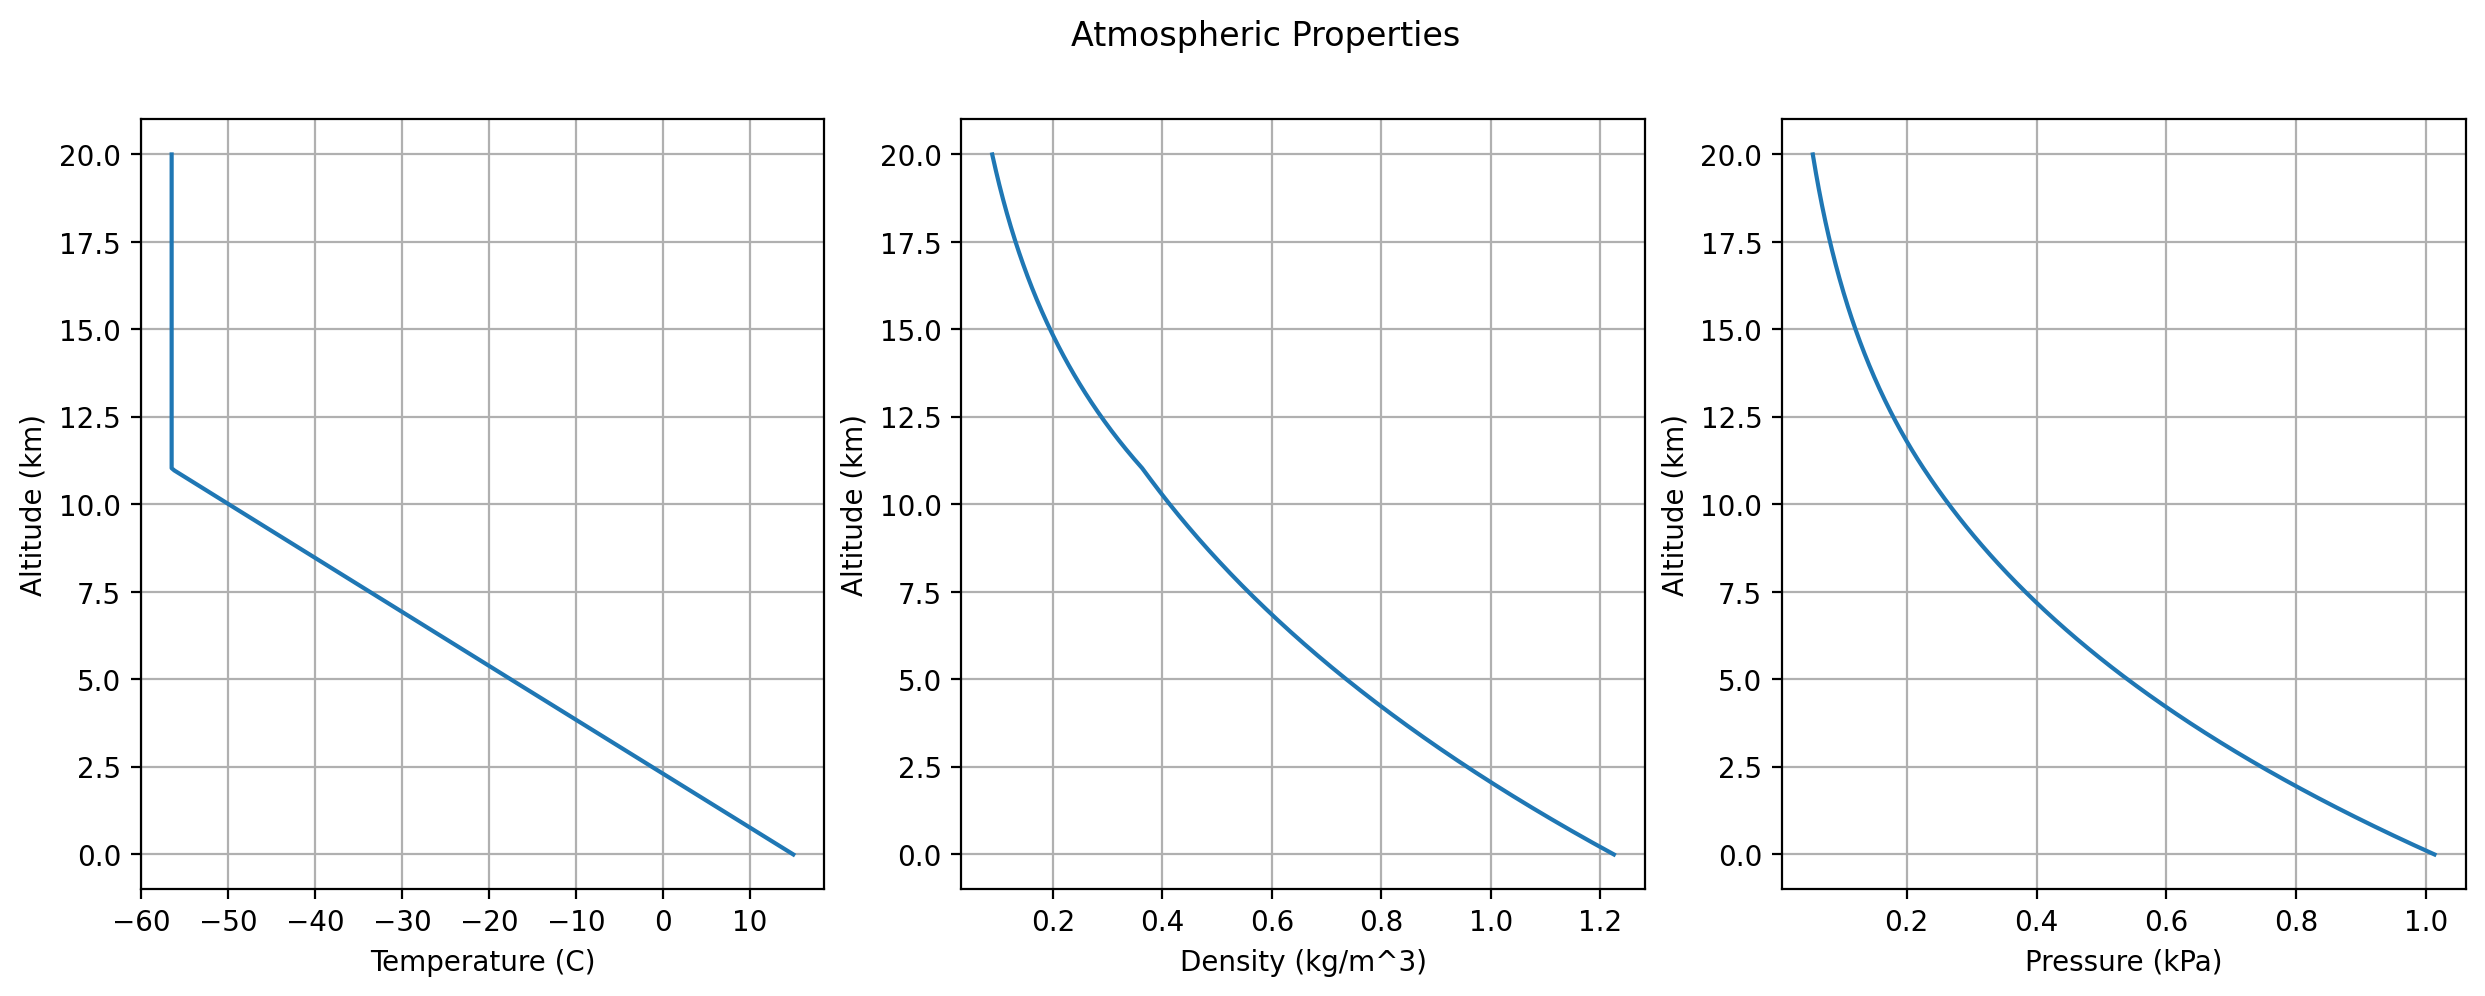

In [20]:
# Plot the temperature, density and pressure versus altitude
altitudes = np.linspace(0, 20000, 300)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(Atmosphere(altitudes).temperature-273.15, altitudes/1000, label='Temperature')
ax[0].set_xlabel('Temperature (C)')
ax[0].set_ylabel('Altitude (km)')
ax[1].plot(Atmosphere(altitudes).density, altitudes/1000, label='Density')
ax[1].set_xlabel('Density (kg/m^3)')
ax[1].set_ylabel('Altitude (km)')
ax[2].plot(Atmosphere(altitudes).pressure/1e5, altitudes/1000, label='Pressure')
ax[2].set_xlabel('Pressure (kPa)')
ax[2].set_ylabel('Altitude (km)')
fig.suptitle('Atmospheric Properties')
for a in ax:
  a.grid()
plt.show()
